In [1]:
# Useful Imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

# Recycling Diversion and Capture Rates

Here, we observe the recycling diversion and capture rates in each district in NYC throughout the fiscal years of 2016 - 2019. 

The recycling rate is defined as the "percentage of total municipal solid waste collected by the Department of Sanitation that is disposed of by recycling."

The capture rate is defined as the "percentage of total Paper or Metal/Glass/Plastic in the waste stream that is disposed of by recycling."

In this section, I set redefined the "Zone" series as the "Borough" in order to simultaneously identify and consolidate each zone into an overall borough in order to gain a quicker understanding as to how many increments are measured regarding our diversion and capture rates.

We also represent the recycling diversion and capture rates per borough, using the avg sum of all our data points.

Here's a link to the DataFrame that I used: https://data.cityofnewyork.us/Environment/Recycling-Diversion-and-Capture-Rates/gaq9-z3hz

In [2]:
recdiv = pd.read_csv(r'Recycling_Diversion_and_Capture_Rates.csv')

In [3]:
# Our initial unaltered DataFrame
recdiv

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Brooklyn North,BKN01,10,2019,April,14.7,44.9,43.0,44.1
1,Brooklyn North,BKN02,10,2019,April,20.0,34.2,57.9,41.2
2,Brooklyn North,BKN03,10,2019,April,12.2,33.5,44.9,38.2
3,Brooklyn North,BKN04,10,2019,April,15.5,35.2,68.5,48.8
4,Brooklyn North,BKN05,10,2019,April,10.1,22.3,45.1,31.5
...,...,...,...,...,...,...,...,...,...
2827,Queens West,QW06,3,2016,September,20.1,30.4,68.0,39.0
2828,Queens West,QW09,3,2016,September,17.4,41.1,79.7,54.3
2829,Staten Island,SI01,3,2016,September,18.7,39.5,71.7,49.7
2830,Staten Island,SI02,3,2016,September,19.0,44.5,75.0,54.1


In [91]:
# Let's consolidate our Zone Series to incoroprate only the names of the Boroughs
recdiv['Zone'] = recdiv['Zone'].replace(['Brooklyn North', 'Brooklyn South', 
                                         'Queens East', 'Queens West'], 
                                        ['Brooklyn', 'Brooklyn', 
                                        'Queens', 'Queens'], inplace=False)

In [94]:
# Rename Zone as Borough
# To more easily work with our Fiscal Year and Months for our analysis of the data, let's rename them
recdiv.rename(columns={'Zone': 'Borough', 'Fiscal Year': 'Fiscal_Year',
                       'Month Name': 'Month_Name'}, inplace=True)

In [95]:
# Our modified DataFrame
recdiv

,Borough,District,Fiscal Month Number,Fiscal_Year,Month_Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Brooklyn,BKN01,10,2019,April,14.7,44.9,43.0,44.1
1,Brooklyn,BKN02,10,2019,April,20.0,34.2,57.9,41.2
2,Brooklyn,BKN03,10,2019,April,12.2,33.5,44.9,38.2
3,Brooklyn,BKN04,10,2019,April,15.5,35.2,68.5,48.8
4,Brooklyn,BKN05,10,2019,April,10.1,22.3,45.1,31.5
...,...,...,...,...,...,...,...,...,...
2827,Queens,QW06,3,2016,September,20.1,30.4,68.0,39.0
2828,Queens,QW09,3,2016,September,17.4,41.1,79.7,54.3
2829,Staten Island,SI01,3,2016,September,18.7,39.5,71.7,49.7
2830,Staten Island,SI02,3,2016,September,19.0,44.5,75.0,54.1


In [96]:
# Here we define variables to call on functions regarding this particular series with ease
# How many measurements
reboro = recdiv['Borough']
fyear = recdiv['Fiscal_Year']
ctreboro = reboro.value_counts()[:5]
ctreboro

Brooklyn         864
Queens           672
Bronx            576
Manhattan        576
Staten Island    144
Name: Borough, dtype: int64

[Text(0.5, 0, 'Number of Measurements'), Text(0, 0.5, 'Borough')]

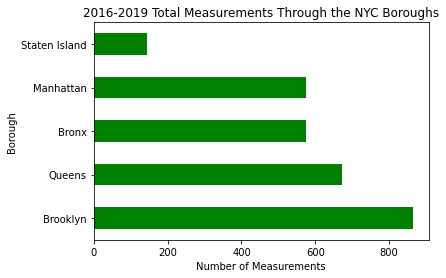

In [56]:
# Let's create a bar graph in order to better visualize this information
pl1 = ctreboro.plot(kind='barh', color='green', title='2016-2019 Total Measurements Through the NYC Boroughs')
pl1.set(xlabel='Number of Measurements', ylabel='Borough')

The first observation we can note from our bar above is that Brooklyn has the greatest amount of measurements throughout 2016-2019. This is followed by Queens, and then both the Bronx and Manhattan are equal. Finally we have Staten Island.

In [83]:
# To differentiate by borough
queens = recdiv[recdiv.Borough == 'Queens']
brooklyn = recdiv[recdiv.Borough == 'Brooklyn']
manhattan = recdiv[recdiv.Borough == 'Manhattan']
bronx = recdiv[recdiv.Borough == 'Bronx']
staten_island = recdiv[recdiv.Borough == 'Staten Island']

queens

,Borough,District,Fiscal Month Number,Fiscal_Year,Month_Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
42,Queens,QE07,10,2019,April,20.2,47.4,70.1,56.0
43,Queens,QE08,10,2019,April,16.5,27.8,56.2,36.2
44,Queens,QE10,10,2019,April,19.0,41.3,96.1,60.8
45,Queens,QE11,10,2019,April,24.2,59.8,96.2,72.7
46,Queens,QE12,10,2019,April,13.9,35.0,68.6,50.5
...,...,...,...,...,...,...,...,...,...
2824,Queens,QW03,3,2016,September,13.6,31.3,63.8,42.4
2825,Queens,QW04,3,2016,September,13.2,33.6,55.9,41.2
2826,Queens,QW05,3,2016,September,23.4,48.0,90.5,62.5
2827,Queens,QW06,3,2016,September,20.1,30.4,68.0,39.0


In [136]:
# Let's simplify our DataFrams we we just see the information we want to know about

qi = queens[['Borough', 'Fiscal_Year', 'Month_Name', 'Diversion Rate-Total (Total Recycling / Total Waste)',
             'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']]

bi = brooklyn[['Borough', 'Fiscal_Year', 'Month_Name', 'Diversion Rate-Total (Total Recycling / Total Waste)',
             'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']]

mi = manhattan[['Borough', 'Fiscal_Year', 'Month_Name', 'Diversion Rate-Total (Total Recycling / Total Waste)',
             'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']]

bxi = bronx[['Borough', 'Fiscal_Year', 'Month_Name', 'Diversion Rate-Total (Total Recycling / Total Waste)',
             'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']]

sti = staten_island[['Borough', 'Fiscal_Year', 'Month_Name', 'Diversion Rate-Total (Total Recycling / Total Waste)',
             'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']]

mi

,Borough,Fiscal_Year,Month_Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
30,Manhattan,2019,April,28.0,54.1
31,Manhattan,2019,April,26.7,51.5
32,Manhattan,2019,April,14.1,42.7
33,Manhattan,2019,April,23.6,45.0
34,Manhattan,2019,April,21.1,42.0
...,...,...,...,...,...
2810,Manhattan,2016,September,25.7,49.6
2811,Manhattan,2016,September,16.4,52.3
2812,Manhattan,2016,September,13.8,43.4
2813,Manhattan,2016,September,11.5,37.7


With this, we can now graph some information regarding the overall average rates throughout NYC

In [135]:
# To differentiate by fical year
y2016 = recdiv[recdiv.Fiscal_Year == 2016]
y2017 = recdiv[recdiv.Fiscal_Year == 2017]
y2018 = recdiv[recdiv.Fiscal_Year == 2018]
y2019 = recdiv[recdiv.Fiscal_Year == 2019]

# Simplify DataFrame for info we want to use
yi2016 = y2016[['Borough', 'Fiscal_Year', 'Month_Name', 'Diversion Rate-Total (Total Recycling / Total Waste)',
             'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']]

yi2017 = y2017[['Borough', 'Fiscal_Year', 'Month_Name', 'Diversion Rate-Total (Total Recycling / Total Waste)',
             'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']]

yi2018 = y2018[['Borough', 'Fiscal_Year', 'Month_Name', 'Diversion Rate-Total (Total Recycling / Total Waste)',
             'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']]

yi2019 = y2019[['Borough', 'Fiscal_Year', 'Month_Name', 'Diversion Rate-Total (Total Recycling / Total Waste)',
             'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100']]

yi2019

,Borough,Fiscal_Year,Month_Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Brooklyn,2019,April,14.7,44.1
1,Brooklyn,2019,April,20.0,41.2
2,Brooklyn,2019,April,12.2,38.2
3,Brooklyn,2019,April,15.5,48.8
4,Brooklyn,2019,April,10.1,31.5
...,...,...,...,...,...
703,Queens,2019,September,20.9,40.5
704,Queens,2019,September,22.4,56.6
705,Staten Island,2019,September,20.4,52.0
706,Staten Island,2019,September,19.5,54.1


Now that we have our specified DataFrames predicated on year and Borough, we can begin to create our plots surrounding the rates over time.

In [137]:
# First, we'll create conditional DataFrames to specify the Boroughs throughout the year of 2016
# Note - there are less redundant ways to do this, but for the sake of practice and only having 5 boroughs I will use this method

qu2016 = yi2016.loc[yi2016['Borough'] == 'Queens']
bk2016 = yi2016.loc[yi2016['Borough'] == 'Brooklyn']
mt2016 = yi2016.loc[yi2016['Borough'] == 'Manhattan']
bx2016 = yi2016.loc[yi2016['Borough'] == 'Bronx']
si2016 = yi2016.loc[yi2016['Borough'] == 'Staten Island']

qu2017 = yi2017.loc[yi2017['Borough'] == 'Queens']
bk2017 = yi2017.loc[yi2017['Borough'] == 'Brooklyn']
mt2017 = yi2017.loc[yi2017['Borough'] == 'Manhattan']
bx2017 = yi2017.loc[yi2017['Borough'] == 'Bronx']
si2017 = yi2017.loc[yi2017['Borough'] == 'Staten Island']

qu2018 = yi2018.loc[yi2018['Borough'] == 'Queens']
bk2018 = yi2018.loc[yi2018['Borough'] == 'Brooklyn']
mt2018 = yi2018.loc[yi2018['Borough'] == 'Manhattan']
bx2018 = yi2018.loc[yi2018['Borough'] == 'Bronx']
si2018 = yi2018.loc[yi2018['Borough'] == 'Staten Island']

qu2019 = yi2019.loc[yi2019['Borough'] == 'Queens']
bk2019 = yi2019.loc[yi2019['Borough'] == 'Brooklyn']
mt2019 = yi2019.loc[yi2019['Borough'] == 'Manhattan']
bx2019 = yi2019.loc[yi2019['Borough'] == 'Bronx']
si2019 = yi2019.loc[yi2019['Borough'] == 'Staten Island']

# Example output of the DataFrame we created
qu2016

,Borough,Fiscal_Year,Month_Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
2166,Queens,2016,April,17.9,54.7
2167,Queens,2016,April,15.9,37.1
2168,Queens,2016,April,21.4,61.6
2169,Queens,2016,April,21.7,74.2
2170,Queens,2016,April,14.0,50.8
...,...,...,...,...,...
2824,Queens,2016,September,13.6,42.4
2825,Queens,2016,September,13.2,41.2
2826,Queens,2016,September,23.4,62.5
2827,Queens,2016,September,20.1,39.0


In [273]:
# You can use df[df.columns[1]].count() to get the values of each individual row
# We'll put the values of our rows into a list

borows2016 = [qu2016[qu2016.columns[1]].count(), mt2016[mt2016.columns[1]].count(),
          bk2016[bk2016.columns[1]].count(), bx2016[bx2016.columns[1]].count(),
          si2016[si2016.columns[1]].count()]

# In order to verify that the rows are of equal measurements throughout the years, use the bottom code

'''
borows2017 = [qu2017[qu2017.columns[1]].count(), mt2017[mt2017.columns[1]].count(),
          bk2017[bk2017.columns[1]].count(), bx2017[bx2017.columns[1]].count(),
          si2017[si2017.columns[1]].count()]

borows2018 = [qu2018[qu2018.columns[1]].count(), mt2018[mt2018.columns[1]].count(),
          bk2018[bk2018.columns[1]].count(), bx2018[bx2018.columns[1]].count(),
          si2018[si2018.columns[1]].count()]

borows2019 = [qu2019[qu2019.columns[1]].count(), mt2019[mt2019.columns[1]].count(),
          bk2019[bk2019.columns[1]].count(), bx2019[bx2019.columns[1]].count(),
          si2019[si2019.columns[1]].count()]
'''

borows2016

[168, 144, 216, 144, 36]

In [283]:
# Now that we have our conditional DataFrames established, we can find and graph the average rates per borough
# We'll use a dictionary format in order to more easily plot the Diversion Rates

# The Average Total Diversion Rate of each Borough throughout the 2016-2019 Fiscal Year
# You can either type out the number of rows or access it through the list borows above
bk_total_div_r_avg2016 = round(bk2016['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / borows2016[2], 1)
qu_total_div_r_avg2016 = round(qu2016['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / borows2016[0], 1)
mt_total_div_r_avg2016 = round(mt2016['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / borows2016[1], 1)
bx_total_div_r_avg2016 = round(bx2016['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / borows2016[3], 1)
si_total_div_r_avg2016 = round(si2016['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / borows2016[4], 1)

# We'll store the avg values for our respective year in our dictionary
div2016dict = {'Brooklyn': bk_total_div_r_avg2016, 'Queens': qu_total_div_r_avg2016, 'Manhattan': mt_total_div_r_avg2016, 
               'The Bronx': bx_total_div_r_avg2016, 'Staten Island': si_total_div_r_avg2016}

# So we see from our output simplified quantitative numbers
print(f'The 2016 Average Total Diversion Rate is:')
[print(key,':',value) for key, value in div2016dict.items()]
print('')

# For the sake of speed, I will plug in the ints as opposed to the list index as our divisor
bk_total_div_r_avg2017 = round(bk2017['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 216, 1)
qu_total_div_r_avg2017 = round(qu2017['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 168, 1)
mt_total_div_r_avg2017 = round(mt2017['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 144, 1)
bx_total_div_r_avg2017 = round(bx2017['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 144, 1)
si_total_div_r_avg2017 = round(si2017['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 36, 1)

div2017dict = {'Brooklyn': bk_total_div_r_avg2017, 'Queens': qu_total_div_r_avg2017, 'Manhattan': mt_total_div_r_avg2017, 
               'The Bronx': bx_total_div_r_avg2017, 'Staten Island': si_total_div_r_avg2017}

print(f'The 2017 Average Total Diversion Rate is:')
[print(key,':',value) for key, value in div2017dict.items()]
print('')

bk_total_div_r_avg2018 = round(bk2018['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 216, 1)
qu_total_div_r_avg2018 = round(qu2018['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 168, 1)
mt_total_div_r_avg2018 = round(mt2018['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 144, 1)
bx_total_div_r_avg2018 = round(bx2018['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 144, 1)
si_total_div_r_avg2018 = round(si2018['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 36, 1)

div2018dict = {'Brooklyn': bk_total_div_r_avg2018, 'Queens': qu_total_div_r_avg2018, 'Manhattan': mt_total_div_r_avg2018, 
               'The Bronx': bx_total_div_r_avg2018, 'Staten Island': si_total_div_r_avg2018}

print(f'The 2018 Average Total Diversion Rate is:')
[print(key,':',value) for key, value in div2018dict.items()]
print('')

bk_total_div_r_avg2019 = round(bk2019['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 216, 1)
qu_total_div_r_avg2019 = round(qu2019['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 168, 1)
mt_total_div_r_avg2019 = round(mt2019['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 144, 1)
bx_total_div_r_avg2019 = round(bx2019['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 144, 1)
si_total_div_r_avg2019 = round(si2019['Diversion Rate-Total (Total Recycling / Total Waste)'].sum() / 36, 1)

div2019dict = {'Brooklyn': bk_total_div_r_avg2019, 'Queens': qu_total_div_r_avg2019, 'Manhattan': mt_total_div_r_avg2019, 
               'The Bronx': bx_total_div_r_avg2019, 'Staten Island': si_total_div_r_avg2019}

print(f'The 2019 Average Total Diversion Rate is:')
[print(key,':',value) for key, value in div2019dict.items()]
print('')

The 2016 Average Total Diversion Rate is:
Brooklyn : 15.8
Queens : 17.8
Manhattan : 20.0
The Bronx : 12.9
Staten Island : 19.8

The 2017 Average Total Diversion Rate is:
Brooklyn : 16.4
Queens : 18.8
Manhattan : 20.4
The Bronx : 13.2
Staten Island : 20.4

The 2018 Average Total Diversion Rate is:
Brooklyn : 16.9
Queens : 19.5
Manhattan : 20.4
The Bronx : 14.0
Staten Island : 20.6

The 2019 Average Total Diversion Rate is:
Brooklyn : 16.9
Queens : 19.4
Manhattan : 21.0
The Bronx : 14.4
Staten Island : 20.9



In [276]:
# The Average Total Capture Rate of each Borough throughout the 2016-2019 Fiscal Year

bk_total_cap_r_avg2016 = round(bk2016['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 216, 1)
qu_total_cap_r_avg2016 = round(qu2016['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 168, 1)
mt_total_cap_r_avg2016 = round(mt2016['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 144, 1)
bx_total_cap_r_avg2016 = round(bx2016['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 144, 1)
si_total_cap_r_avg2016 = round(si2016['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 36, 1)

cap2016dict = {'Brooklyn': bk_total_cap_r_avg2016, 'Queens': qu_total_cap_r_avg2016, 'Manhattan': mt_total_cap_r_avg2016, 
               'The Bronx': bx_total_cap_r_avg2016, 'Staten Island': si_total_cap_r_avg2016}

print(f'The 2016 Average Total Capture Rate is:')
[print(key,':',value) for key, value in cap2016dict.items()]
print('')

bk_total_cap_r_avg2017 = round(bk2017['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 216, 1)
qu_total_cap_r_avg2017 = round(qu2017['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 168, 1)
mt_total_cap_r_avg2017 = round(mt2017['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 144, 1)
bx_total_cap_r_avg2017 = round(bx2017['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 144, 1)
si_total_cap_r_avg2017 = round(si2017['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 36, 1)

cap2017dict = {'Brooklyn': bk_total_cap_r_avg2017, 'Queens': qu_total_cap_r_avg2017, 'Manhattan': mt_total_cap_r_avg2017, 
               'The Bronx': bx_total_cap_r_avg2017, 'Staten Island': si_total_cap_r_avg2017}

print(f'The 2017 Average Total Capture Rate is:')
[print(key,':',value) for key, value in cap2017dict.items()]
print('')

bk_total_cap_r_avg2018 = round(bk2018['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 216, 1)
qu_total_cap_r_avg2018 = round(qu2018['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 168, 1)
mt_total_cap_r_avg2018 = round(mt2018['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 144, 1)
bx_total_cap_r_avg2018 = round(bx2018['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 144, 1)
si_total_cap_r_avg2018 = round(si2018['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 36, 1)

cap2018dict = {'Brooklyn': bk_total_cap_r_avg2018, 'Queens': qu_total_cap_r_avg2018, 'Manhattan': mt_total_cap_r_avg2018, 
               'The Bronx': bx_total_cap_r_avg2018, 'Staten Island': si_total_cap_r_avg2018}

print(f'The 2018 Average Total Capture Rate is:')
[print(key,':',value) for key, value in cap2018dict.items()]
print('')

bk_total_cap_r_avg2019 = round(bk2019['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 216, 1)
qu_total_cap_r_avg2019 = round(qu2019['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 168, 1)
mt_total_cap_r_avg2019 = round(mt2019['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 144, 1)
bx_total_cap_r_avg2019 = round(bx2019['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 144, 1)
si_total_cap_r_avg2019 = round(si2019['Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100'].sum() / 36, 1)

cap2019dict = {'Brooklyn': bk_total_cap_r_avg2019, 'Queens': qu_total_cap_r_avg2019, 'Manhattan': mt_total_cap_r_avg2019, 
               'The Bronx': bx_total_cap_r_avg2019, 'Staten Island': si_total_cap_r_avg2019}

print(f'The 2019 Average Total Capture Rate is:')
[print(key,':',value) for key, value in cap2019dict.items()]
print('')

The 2016 Average Total Capture Rate is:
Brooklyn : 43.9
Queens : 49.1
Manhattan : 45.7
The Bronx : 39.0
Staten Island : 54.9

The 2017 Average Total Capture Rate is:
Brooklyn : 45.5
Queens : 50.6
Manhattan : 46.4
The Bronx : 39.9
Staten Island : 56.3

The 2018 Average Total Capture Rate is:
Brooklyn : 45.9
Queens : 50.8
Manhattan : 46.1
The Bronx : 40.5
Staten Island : 55.7

The 2019 Average Total Capture Rate is:
Brooklyn : 46.0
Queens : 50.1
Manhattan : 47.0
The Bronx : 41.5
Staten Island : 55.2



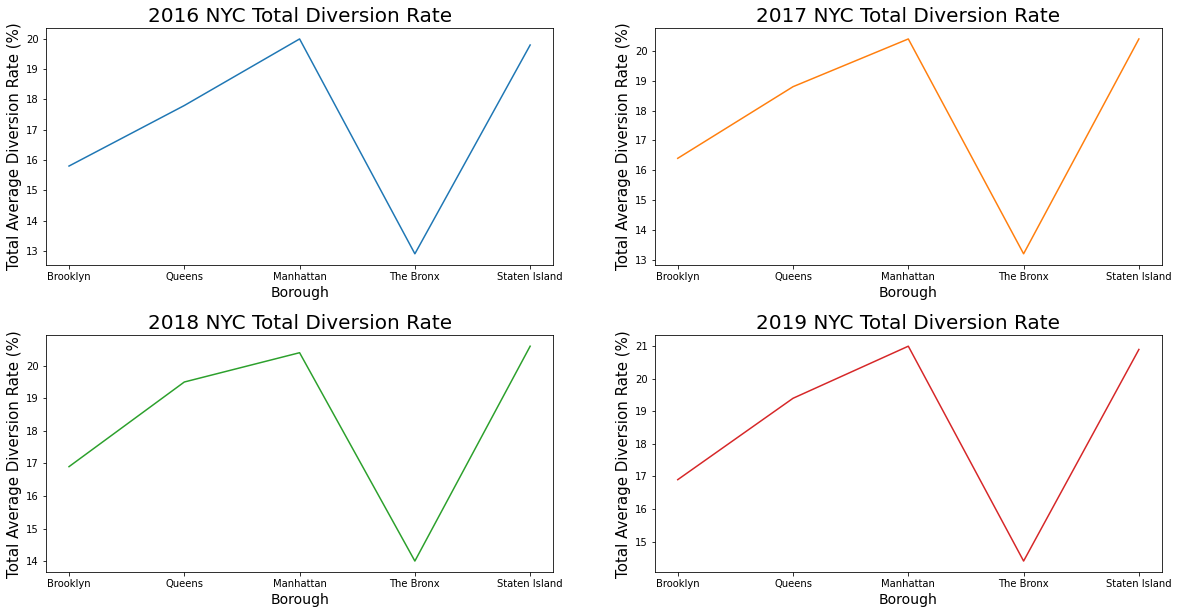

In [277]:
# Now that we've created a formula that outputs our average diversion rates, we can plot our figure

# Establish x & y parameters which we get from the dictionary we created above
x1, y1 = zip(*div2016dict.items())
x2, y2 = zip(*div2017dict.items())
x3, y3 = zip(*div2018dict.items())
x4, y4 = zip(*div2019dict.items())

fig, axs = plt.subplots(2, 2, figsize=(20, 10))
# To keep from the graphs stacking on top of each other, use plt.subplots_adjust()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

# Establish our graphs for each year
axs[0, 0].plot(x1, y1)
axs[0, 0].set_title('2016 NYC Total Diversion Rate', fontsize=20)
axs[0, 1].plot(x2, y2, 'tab:orange')
axs[0, 1].set_title('2017 NYC Total Diversion Rate', fontsize=20)
axs[1, 0].plot(x3, y3, 'tab:green')
axs[1, 0].set_title('2018 NYC Total Diversion Rate', fontsize=20)
axs[1, 1].plot(x4, y4, 'tab:red')
axs[1, 1].set_title('2019 NYC Total Diversion Rate', fontsize=20)

# Iteration in order to label each graph's x & y axes as the same
for ax in axs.flat:
    ax.set_xlabel('Borough', fontsize=14)
    ax.set_ylabel('Total Average Diversion Rate (%)', fontsize=15)

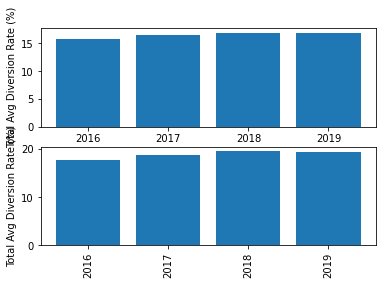

In [270]:
# This is an alternative method of plotting the diversion rate which may be better suited, as a line plot
# may give us the wrong impression - that the boroughs contribute to the difference in their compatriots' rates

'''
# The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(2,1,1)
#This will create the bar graph for poulation
alt = plt.bar(x1, y1)
plt.ylabel('Total Avg Diversion Rate (%)')
plt.xticks(x1)
#The below code will create the second plot.
plt.subplot(2,1,2)
#This will create the bar graph for gdp i.e gdppercapita divided by population.
alt2 = plt.bar(x2, y2)
plt.ylabel('Total Avg Diversion Rate (%)')
plt.xticks(x2, rotation='vertical')
plt.show()
'''

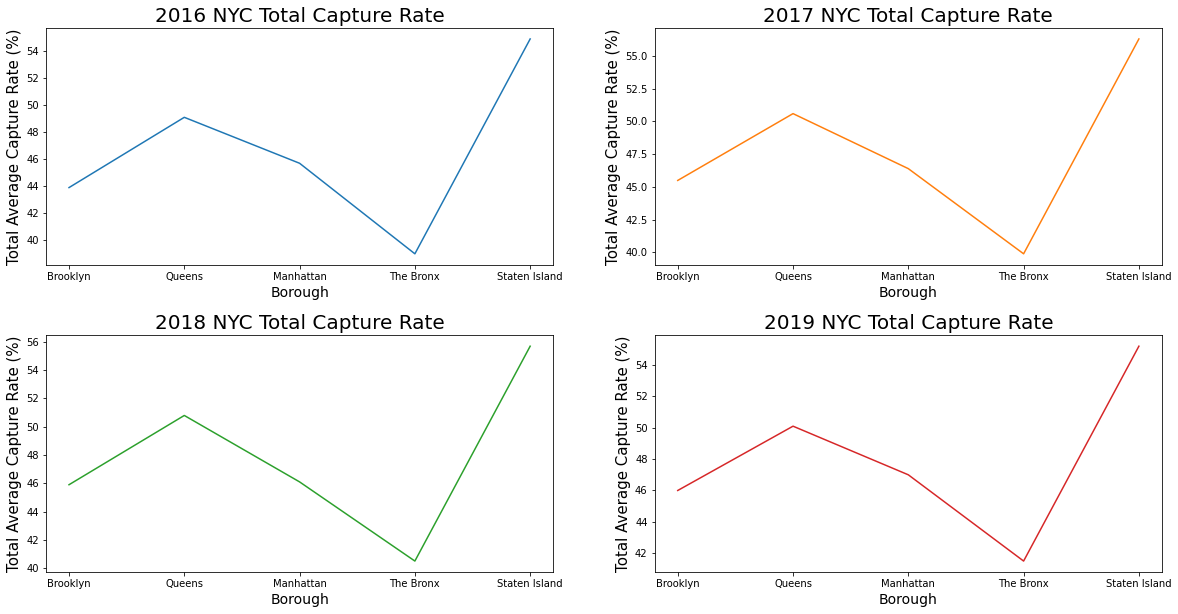

In [278]:
# Likewise we can do this for the capture rate

x5, y5 = zip(*cap2016dict.items())
x6, y6 = zip(*cap2017dict.items())
x7, y7 = zip(*cap2018dict.items())
x8, y8 = zip(*cap2019dict.items())

fig, axs = plt.subplots(2, 2, figsize=(20, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)

axs[0, 0].plot(x5, y5)
axs[0, 0].set_title('2016 NYC Total Capture Rate', fontsize=20)
axs[0, 1].plot(x6, y6, 'tab:orange')
axs[0, 1].set_title('2017 NYC Total Capture Rate', fontsize=20)
axs[1, 0].plot(x7, y7, 'tab:green')
axs[1, 0].set_title('2018 NYC Total Capture Rate', fontsize=20)
axs[1, 1].plot(x8, y8, 'tab:red')
axs[1, 1].set_title('2019 NYC Total Capture Rate', fontsize=20)

for ax in axs.flat:
    ax.set_xlabel('Borough', fontsize=14)
    ax.set_ylabel('Total Average Capture Rate (%)', fontsize=15)

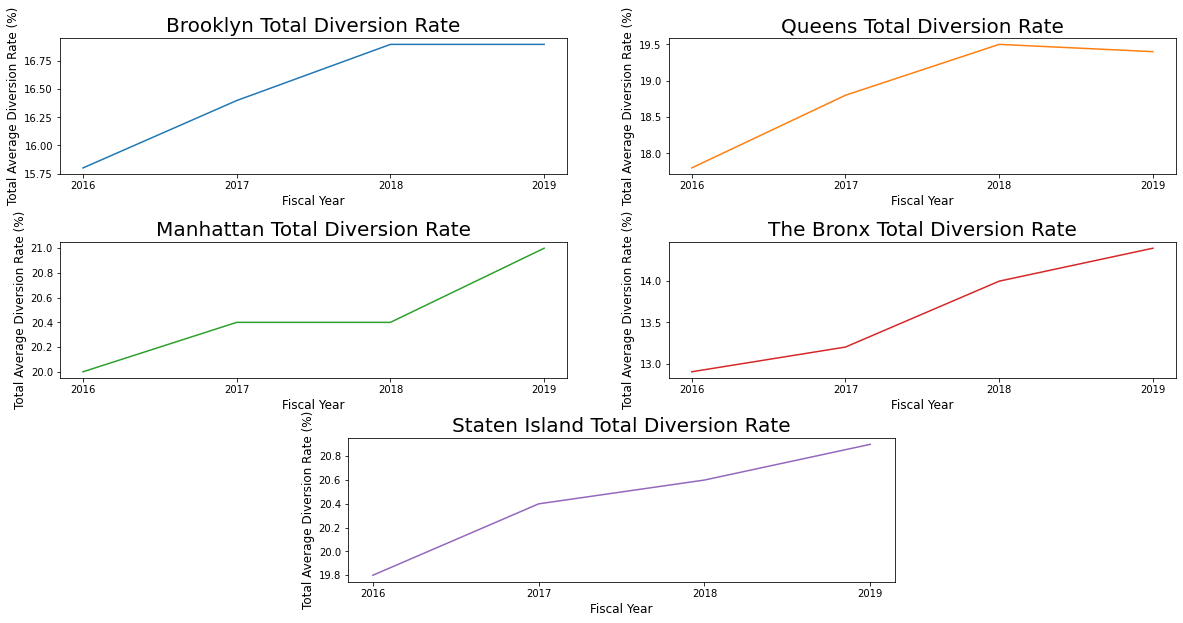

In [279]:
# Instead of using the x-axis as the boroughs, let's use the Fiscal Year and create subplots based on the borough
# For this, since we already have our average rates for each borough, we can store it in a list

# Formatted as string bc currently unsure how to eliminate decimals in between (ie: 2016, 2016.5, 2017, etc.)
years = np.array(['2016', '2017', '2018', '2019'])
# List of our respective Boroughs' Distribution Rates which becomes our y - axis
bkdistrte = [bk_total_div_r_avg2016, bk_total_div_r_avg2017, bk_total_div_r_avg2018, bk_total_div_r_avg2019]
qudistrte = [qu_total_div_r_avg2016, qu_total_div_r_avg2017, qu_total_div_r_avg2018, qu_total_div_r_avg2019]
mtdistrte = [mt_total_div_r_avg2016, mt_total_div_r_avg2017, mt_total_div_r_avg2018, mt_total_div_r_avg2019]
bxdistrte = [bx_total_div_r_avg2016, bx_total_div_r_avg2017, bx_total_div_r_avg2018, bx_total_div_r_avg2019]
sidistrte = [si_total_div_r_avg2016, si_total_div_r_avg2017, si_total_div_r_avg2018, si_total_div_r_avg2019]

x1, y1 = years, bkdistrte
x2, y2 = years, qudistrte
x3, y3 = years, mtdistrte
x4, y4 = years, bxdistrte
x5, y5 = years, sidistrte

fig, axs = plt.subplots(3, 2, figsize=(20, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

axs[0, 0].plot(x1, y1)
axs[0, 0].set_title('Brooklyn Total Diversion Rate', fontsize=20)
axs[0, 1].plot(x2, y2, 'tab:orange')
axs[0, 1].set_title('Queens Total Diversion Rate', fontsize=20)
axs[1, 0].plot(x3, y3, 'tab:green')
axs[1, 0].set_title('Manhattan Total Diversion Rate', fontsize=20)
axs[1, 1].plot(x4, y4, 'tab:red')
axs[1, 1].set_title('The Bronx Total Diversion Rate', fontsize=20)
axs[2, 0].plot(x5, y5, 'tab:purple')
axs[2, 0].set_title('Staten Island Total Diversion Rate', fontsize=20)
# Something extra to orient the Staten Island data in the middle so it looks neat
axs[2][0].set_position([.325, .125, .38, .2])
# Clean up the figure by making the extra plot that comes up invisible
axs[2][1].set_visible(False)

for ax in axs.flat:
    ax.set_xlabel('Fiscal Year', fontsize=12)
    ax.set_ylabel('Total Average Diversion Rate (%)', fontsize=12)

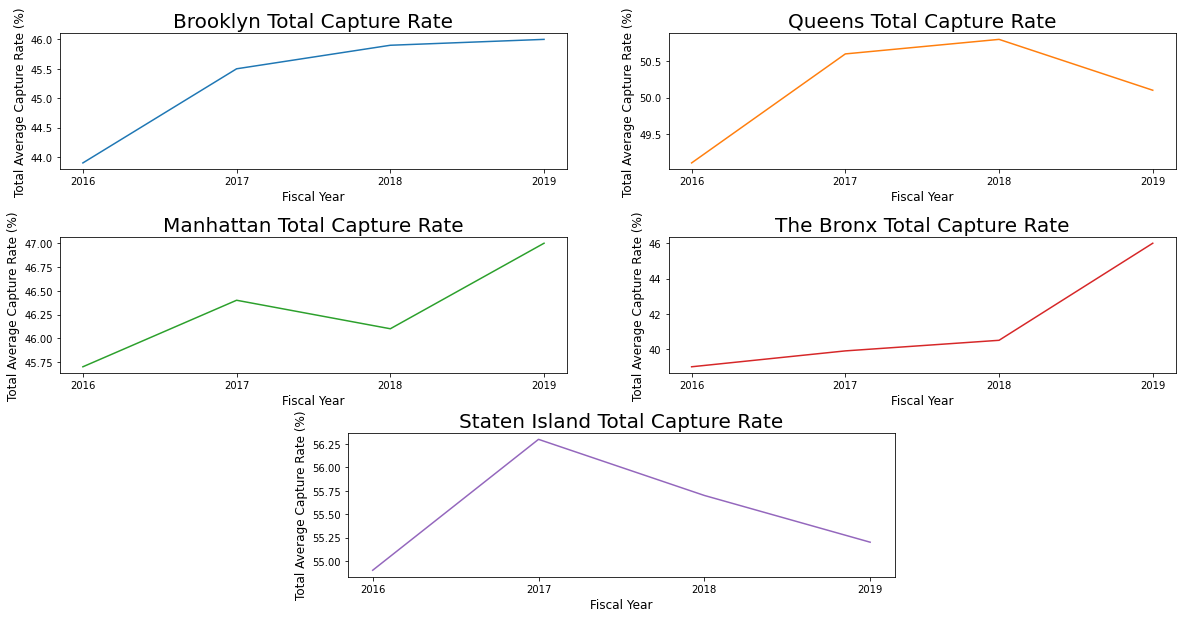

In [280]:
# For our total avg capture rates

# List of Capture Rates for each Borough (y-axis)
bkcaprte = [bk_total_cap_r_avg2016, bk_total_cap_r_avg2017, bk_total_cap_r_avg2018, bk_total_cap_r_avg2019]
qucaprte = [qu_total_cap_r_avg2016, qu_total_cap_r_avg2017, qu_total_cap_r_avg2018, qu_total_cap_r_avg2019]
mtcaprte = [mt_total_cap_r_avg2016, mt_total_cap_r_avg2017, mt_total_cap_r_avg2018, mt_total_cap_r_avg2019]
bxcaprte = [bx_total_cap_r_avg2016, bx_total_cap_r_avg2017, bx_total_cap_r_avg2018, bk_total_cap_r_avg2019]
sicaprte = [si_total_cap_r_avg2016, si_total_cap_r_avg2017, si_total_cap_r_avg2018, si_total_cap_r_avg2019]

x6, y6 = years, bkcaprte
x7, y7 = years, qucaprte
x8, y8 = years, mtcaprte
x9, y9 = years, bxcaprte
x10, y10 = years, sicaprte

fig, axs = plt.subplots(3, 2, figsize=(20, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

axs[0, 0].plot(x6, y6)
axs[0, 0].set_title('Brooklyn Total Capture Rate', fontsize=20)
axs[0, 1].plot(x7, y7, 'tab:orange')
axs[0, 1].set_title('Queens Total Capture Rate', fontsize=20)
axs[1, 0].plot(x8, y8, 'tab:green')
axs[1, 0].set_title('Manhattan Total Capture Rate', fontsize=20)
axs[1, 1].plot(x9, y9, 'tab:red')
axs[1, 1].set_title('The Bronx Total Capture Rate', fontsize=20)
axs[2, 0].plot(x10, y10, 'tab:purple')
axs[2, 0].set_title('Staten Island Total Capture Rate', fontsize=20)
axs[2][0].set_position([.325, .125, .38, .2])
axs[2][1].set_visible(False)

for ax in axs.flat:
    ax.set_xlabel('Fiscal Year', fontsize=12)
    ax.set_ylabel('Total Average Capture Rate (%)', fontsize=12)

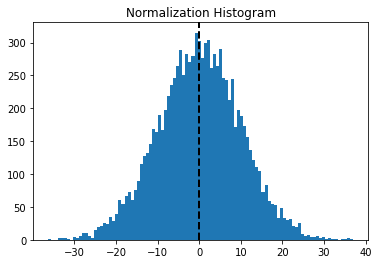

In [265]:
# With these kinds of plots, it's difficult to see the change in rates over time per borough, so let's normalize the data to note the
# subtle changes in the average rates
# Graph summation of the avg from 2016 - 2019
# Plot monthly rates for each respective fiscal year to chart the changes over time

# min max normal distribution
# normalized_df_queens["Normalized Capture Rate"] = (df["Capture Rate"] - df["Capture Rate"].min()) / (df.max() - df.min())

# position
pos = 0
# scale
scale = 10
# size
size = 10000

# random seed
np.random.seed(10)

# creating a normal distribution data
values = np.random.normal(pos, scale, size)

# plotting histograph
plt.hist(values, 100)
plt.title('Normalization Histogram')
# plotting mean line
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=2)

plt.show()

# NYC Public Recycling Bins

In [32]:
nycrbin = pd.read_csv(r"C:\Users\dylan\Dropbox\My PC (LAPTOP-47DRK7HC)\Desktop\Classwork\DS2022\Week-024\Project_Files\Public_Recycling_Bins.csv")

In [33]:
nycrbin

,Borough,Site type,Park/Site Name,Address,Latitude,Longitude
0,Bronx,Subproperty,227th St. Plgd,E 227 St/Bronx River Pkway,40.890849,-73.864224
1,Bronx,Subproperty,Allerton Ballfields,Allerton Ave & Moshulu Pkway,40.848891,-73.877128
2,Bronx,Outdoor,Arthur Ave & E 187 St,Arthur Ave & 187 St,40.855570,-73.887565
3,Bronx,Outdoor,Barstow Mansion,"895 Shore Road, Pelham Bay Park",40.871864,-73.805549
4,Bronx,Subproperty,Bradley Playground,2001-2017 Bronx Park E,40.851889,-73.868549
...,...,...,...,...,...,...
540,Staten Island,Indoor,West Brighton Pool,899 Henderson Ave,40.637121,-74.119287
541,Staten Island,Outdoor,Willowbrook Park,Willowbrook Park,40.603832,-74.158697
542,Staten Island,Outdoor,Willowbrook Park,Willowbrook Park,40.603828,-74.161250
543,Staten Island,Outdoor,Wolfe's Pond,Wolfe's Pond,40.517368,-74.190913


In [ ]:
# Coordinate address with the respective district, and then join from there
# Check between correlation rates and then recycling bins with respect to each district

In [57]:
binboro = nycrbin['Borough']
ctbinboro = binboro.value_counts()[:5]
ctbinboro

Manhattan        184
Queens           117
Bronx            108
Brooklyn          89
Staten Island     42
Name: Borough, dtype: int64

[Text(0.5, 0, 'Number of Recycling Bins'), Text(0, 0.5, 'Borough')]

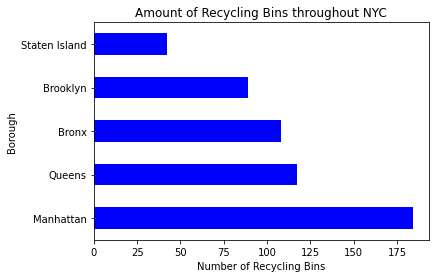

In [60]:
pltrb = ctbinboro.plot(kind='barh', color='blue', title='Amount of Recycling Bins throughout NYC')
pltrb.set(xlabel='Number of Recycling Bins', ylabel='Borough')

# Combining both the Rates & Available Recycling Bins

In [ ]:
recycle = [recdiv, nycrbin]
recyclebins = pd.concat(recycle, axis=0)